In [43]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [44]:
import pandas as pd
import numpy as np
import json
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from PIL import Image
from PIL import Image, ImageDraw
import cv2
import random

import matplotlib
import matplotlib.pyplot as plt

is correct? : False


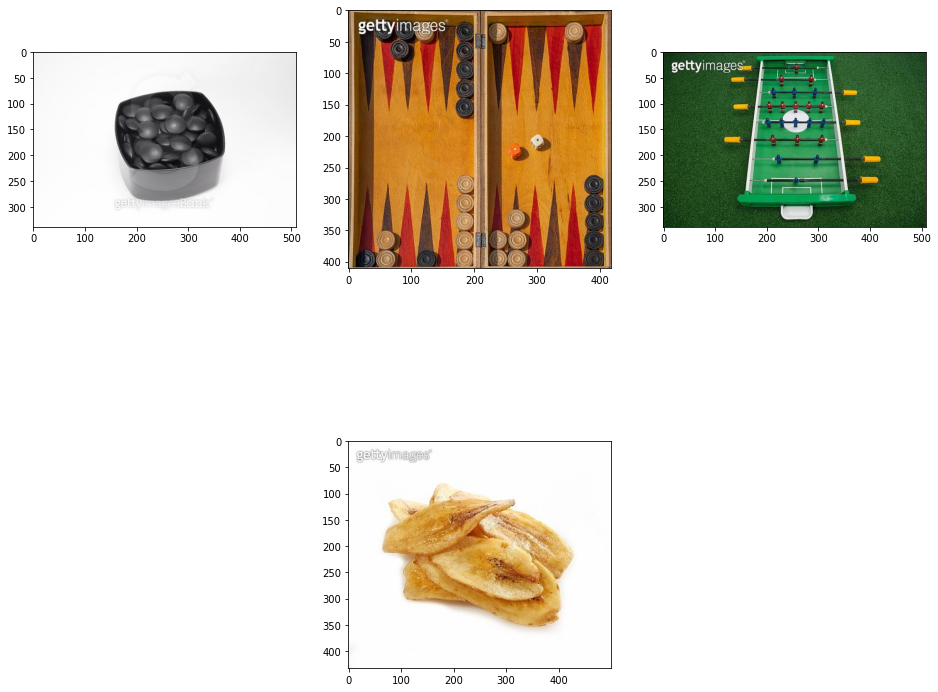

In [45]:
import os
os.chdir(f'/home/mjkim/VR/')
folder_name = os.listdir("./data/category_1/")[9]
os.chdir(f'/home/mjkim/VR/data/category_1/{folder_name}')

file_list = os.listdir(f"./")
for file_name in file_list:
    if file_name.endswith('.json'):
        json_file = file_name
        file_list.remove(file_name)
"""
print(f'jpg_list : {file_list}')
print(f'json_file : {json_file}')
"""

a_data = json.load(open(f'./{json_file}'))
answer = a_data['Answers'][0]['images'][0]['image_url']

file_list.remove(answer)

print(f"is correct? : {a_data['is_correct']}")

plt.figure(figsize=(16, 14))

for i in range(len(file_list)):
    question_img = Image.open(f'./{file_list[i]}')
    plt.subplot(2, len(file_list), i+1)
    plt.imshow(question_img)

#plot answer image
answer_img = Image.open(f'./{answer}')
plt.subplot(2, len(file_list), int(len(file_list)*3/2)+1)
plt.imshow(answer_img)
plt.show()

In [46]:
os.chdir(f'/home/mjkim/VR/')
folder_name = sorted(os.listdir("./data/category_1/"))

question_img_1 = []
question_img_2 = []
question_img_3 = []
answer_img_arr = []
label = []

for elements in folder_name:
    file_list = os.listdir(f"./data/category_1/{elements}")
    for file_name in file_list:
        if file_name.endswith('.json'):
            json_file = file_name
            file_list.remove(file_name) 
    a_data = json.load(open(f'./data/category_1/{elements}/{json_file}'))
    answer = a_data['Answers'][0]['images'][0]['image_url']
    file_list.remove(answer)

    label.append(a_data['is_correct'])
    question_img_1.append(file_list[0])
    question_img_2.append(file_list[1])
    question_img_3.append(file_list[2])

    answer_img_arr.append(answer)


In [47]:
df = pd.DataFrame(zip(folder_name, question_img_1,question_img_2, question_img_3, answer_img_arr, label), columns=['folder_name', 'img_1', 'img_2', 'img_3', 'answer_img', 'label'])
df

,folder_name,img_1,img_2,img_3,answer_img,label
0,006005,c6ddd938c0d24475ba9c2cf36073469f.jpg,e243e7f81cad45e69ef756724ea925c8.jpg,5f4d41b00f4c4041ac8a1b62a284099e.jpg,ab6f9a5b57334c5d9d16cb609f33a092.jpg,False
1,006011,b71eb86041594cd6b97776d64ca2884c.jpg,461b71553a64449faabd1a0cc88cc115.jpg,bcc661e30e454b878ec53577fd57a692.jpg,5a8676d4cb5e449dbcf1f938f8d6d2cf.jpg,False
2,006012,bbe9a0bd96a44ac3abe172483ef14289.jpg,041dcc3522d243cf93a53b11707fe1fa.jpg,a7fdbb52272b4a3983298dc82be897ce.jpg,f51cdebbf4664226b57747cbd1519a8e.jpg,True
3,006013,c97cfe6bb53f42ddbcc5e28e035d879d.jpg,c6dd72e0ebca431792bb4e93dd131826.jpg,a25d67c834f341b79573bb44848a6a94.jpg,045e18ed5e02444a8405dd1306ff859a.jpg,False
4,006015,d346ff957f9e41d9b5974fbbbda61507.jpg,0290379e5aed407b802f2d32e3ff2794.jpg,3d117f63b71e48c0a97709082e1c6523.jpg,01580ccca1b346b9b13dabfc5e8f4695.jpg,True
...,...,...,...,...,...,...
10727,251996,0a4af86c5cba43d99e02579093360e05.jpg,cff9d174bbd448688200a167c6f615ff.jpg,ff9177e9de5f4fdba0ae265c70e3760d.jpg,a9b60400956c4d2e942831c6f57900aa.jpg,True
10728,252455,d7b07a4e2bcb46fd98c9502dad29603a.jpg,a0b38953132749129b06f31b56a53c70.jpg,4e11fa25102248788492e2ddfc2059ad.jpg,89b82c1231f04d648eea5c57f1a870f1.jpg,True
10729,252809,da63b6d67d5943f49431f58448b9b55b.jpg,c5901920f8d44ee7919951b8554ba04a.jpg,20dc9f2795f641f58e40552798c44906.jpg,269f66606519475f825799fc14a9e4e4.jpg,True
10730,252879,30eb8638c67740c6a7452a7c21470bf9.jpg,6ff6016a1de143b78491670775b99aa7.jpg,8269bb66fa3e477abd9f26d1944560b7.jpg,99671d1742ed4860b1329c3b633114d5.jpg,True


In [48]:
sample = df.iloc[0]
sample[1]

'c6ddd938c0d24475ba9c2cf36073469f.jpg'

In [49]:
batch = df

target_a1 = batch["label"], (batch["label"] == 0)
target_a1[0]


0        False
1        False
2         True
3        False
4         True
         ...  
10727     True
10728     True
10729     True
10730     True
10731     True
Name: label, Length: 10732, dtype: bool

In [50]:
transform = transforms.Compose(
    [
        transforms.Resize((256, 256)),
        transforms.RandomCrop((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)


In [51]:
class Category1_Dataset(torch.utils.data.Dataset):
    def __init__(self, df, config=None, transform=None):
        self.df = df
        self.config = config
        self.transform = transform
        
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        
        folder = sample[0]+'/'

        img_1_path = './data/category_1/'+folder+sample[1]
        img_2_path = './data/category_1/'+folder+sample[2]
        img_3_path = './data/category_1/'+folder+sample[3]

        ans_img_path = './data/category_1/'+folder+sample[4]
        label = sample[5]

        
        img_1_feature = Image.open(img_1_path).convert('RGB')
        img_2_feature = Image.open(img_2_path).convert('RGB') 
        img_3_feature = Image.open(img_3_path).convert('RGB')  
        img_ans_feature = Image.open(ans_img_path).convert('RGB')
        
        img_1_feature = self.transform(img_1_feature)  
        img_2_feature = self.transform(img_2_feature)  
        img_3_feature = self.transform(img_3_feature)  
        img_ans_feature = self.transform(img_ans_feature)        
        
        return {
            "label": label,
            "img_1": img_1_feature,
            "img_2": img_2_feature,
            "img_3": img_3_feature,
            "answer": img_ans_feature
        }
        
    

In [52]:
def make_sequential(in_channels, out_channels, *args, **kwargs):
    return nn.Sequential(nn.Conv2d(in_channels, out_channels, *args, **kwargs),
           nn.BatchNorm2d(out_channels),
           nn.ReLu(),
           nn.MaxPool2d(*args, **kwargs))

class VRCategory(nn.Module):
    def __init__(self, config):
        super(VRCategory, self).__init__()
        
        self.config = config
        self.backborne = torchvision.models.resnet50(pretrained=True)
        self.backborne.fc = nn.Linear(self.backborne.fc.in_features, self.config.input_dim)
        self.fc = nn.Sequential(
                    nn.Linear(self.config.input_dim*4, self.config.mlp_hidden),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(self.config.mlp_hidden, 2), 
        )

    def forward(self, samples):
        
        #Question Image Feature
        q_img1 = self.backborne(samples["img_1"])
        q_img2 = self.backborne(samples["img_2"])
        q_img3 = self.backborne(samples["img_3"])

        
        #Answer1 Image Feature
        a_img = self.backborne(samples["answer"])

        
        
        q_a1 = torch.cat([q_img1, q_img2, q_img3, a_img], axis=1)
        
        q_a1_logit = self.fc(q_a1)
        
        return {
            "q_a1_logit": F.log_softmax(q_a1_logit, dim=1),
        }


In [53]:
def train_fn(model, train_loader, optimizer, loss_fn, config):
    
    total_count_correct = 0
    total_num_example = 0
    total_loss = []
    
    model.train()
    device = "cuda"
    
    for batch in tqdm(train_loader):          
        
        #Question Image Feature
        batch["img_1"] = batch["img_1"].to(device)
        batch["img_2"] = batch["img_2"].to(device)
        batch["img_3"] = batch["img_3"].to(device)

        
        #Answer Image Feature
        batch["answer"] = batch["answer"].to(device)

        batch["label"] = batch["label"].to(device)
        
        logits = model(batch)

        target = batch["label"].long().to(device)
        loss = loss_fn(logits["q_a1_logit"].squeeze(), target)
        
        total_loss.append(loss.item())
        
        predicted = logits["q_a1_logit"].argmax(dim=1, keepdim=True).squeeze()
        total_count_correct = total_count_correct + torch.sum(predicted == target).item()
        total_num_example = total_num_example + target.size(0)


        '''
        print(predicted_a1)
        print(target_a1)
        print(predicted_a1 == target_a1)
        print(predicted_a2)
        print(target_a2)
        print(predicted_a2 == target_a2)
        print("total_count_correct", total_count_correct)
        print("total_num_example", total_num_example)
        '''
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("TRAIN_LOSS:", str(sum(total_loss)/total_num_example) + " TRAIN_Accuracy: " + str(total_count_correct/total_num_example) )


In [54]:
def valid_fn(model, valid_loader, config):
    
    total_count_correct = 0
    total_num_example = 0
    device = "cuda"
    
    model.eval()
    with torch.no_grad():
        for batch in tqdm(valid_loader):          

            #Question Image Feature
            batch["img_1"] = batch["img_1"].to(device)
            batch["img_2"] = batch["img_2"].to(device)
            batch["img_3"] = batch["img_3"].to(device)

            
            #Answer Image Feature
            batch["answer"] = batch["answer"].to(device)

            batch["label"] = batch["label"].to(device)
            logits = model(batch)

            # target_a1 = batch["target"].long().to(device), (batch["target"] == 0).type(torch.long).to(device)
            target = batch["label"].long().to(device)

            predicted_a1 = logits["q_a1_logit"].argmax(dim=1, keepdim=True).squeeze()
            total_count_correct = total_count_correct + torch.sum(predicted_a1 == target).item()
            total_num_example = total_num_example + target.size(0)

#             predicted_a2 = logits["q_a2_logit"].argmax(dim=1, keepdim=True).squeeze()
#             total_count_correct = total_count_correct + torch.sum(predicted_a2 == target_a2).item()
#             total_num_example = total_num_example + target_a2.size(0)

            '''
            print(predicted_a1)
            print(target_a1)
            print(predicted_a1 == target_a1)
            print(predicted_a2)
            print(target_a2)
            print(predicted_a2 == target_a2)
            print("total_count_correct", total_count_correct)
            print("total_num_example", total_num_example)
            '''

    print("Valid Accuracy: " + str(total_count_correct/total_num_example) )


In [55]:
class Config:
    def __init__(self, args=None):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.distributed = False
        self.gpu_id = "0,1"
        self.input_dim = 512
        self.mlp_hidden = 1024

config = Config()

In [56]:
train_df, valid_df = train_test_split(df)

train_datasets = Category1_Dataset(train_df, transform=transform)
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=64)

valid_datasets = Category1_Dataset(valid_df, transform=transform)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=64)

model = VRCategory(config)
#vrs1_model = torch.nn.DataParallel(vrs1_model)
model = model.to(config.device)
if config.distributed:
    #vrs1_model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[config.gpu])    
    model = torch.nn.parallel.DistributedDataParallel(model)    

optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.NLLLoss(reduction="sum")


In [57]:
train_fn(model, train_loader=train_loader, optimizer=optimizer, loss_fn=loss_fn, config=config)

100%|██████████| 126/126 [05:19<00:00,  2.54s/it]

TRAIN_LOSS: 0.2694695863476124 TRAIN_Accuracy: 0.8864455211827557


In [58]:
valid_fn(model, valid_loader=valid_loader, config=config)

100%|██████████| 42/42 [01:48<00:00,  2.59s/it]

Valid Accuracy: 0.8643309727916512
